In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
flowers = load_iris()
dir(flowers)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(flowers.data,columns=flowers.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = flowers.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['target_names'] = df.target.apply(lambda x: flowers.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df.target_names.value_counts()

,count
target_names,
setosa,50
versicolor,50
virginica,50


In [8]:
df.target.value_counts()

,count
target,
0,50
1,50
2,50


In [9]:
setosa = df[df.target_names =='setosa']
versicolor = df[df.target_names =='versicolor']
virginica = df[df.target_names =='virginica']
virginica.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


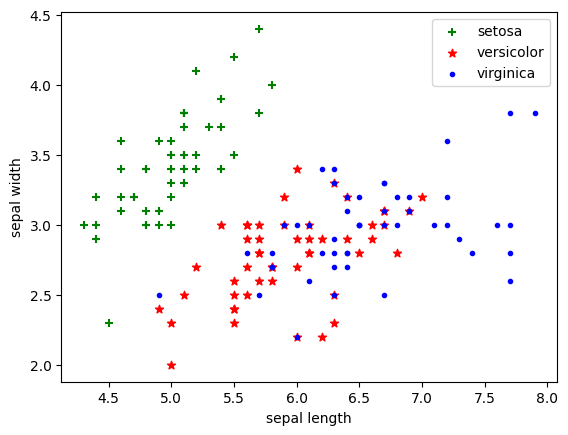

In [12]:
plt.scatter(setosa['sepal length (cm)'],setosa['sepal width (cm)'],color='green',marker='+')
plt.scatter(versicolor['sepal length (cm)'],versicolor['sepal width (cm)'],color='red',marker='*')
plt.scatter(virginica['sepal length (cm)'],virginica['sepal width (cm)'],color='blue',marker='.')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

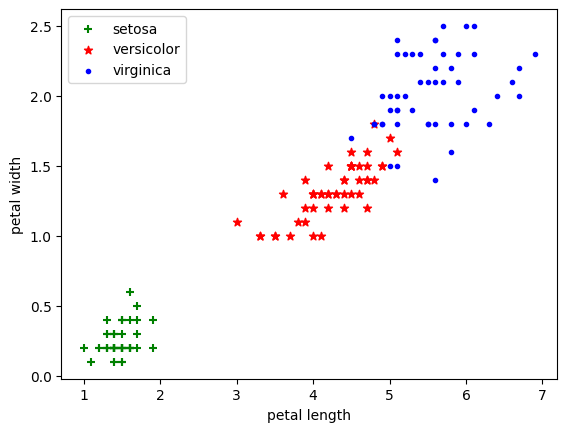

In [13]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],color='green',marker='+')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],color='red',marker='*')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],color='blue',marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [14]:
x = df.drop(['target','target_names'],axis='columns')
y = df.target
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [19]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [20]:
model.score(x_test,y_test)

0.9333333333333333

In [21]:
y_pred = model.predict(x_test)
y_pred[0:5]

array([1, 0, 2, 2, 0])

In [23]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  2,  8]])

## Exercise

In [24]:
from sklearn.datasets import load_digits

In [25]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [27]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [28]:
digits.target_names[0]

np.int64(0)

In [29]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [30]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

<Figure size 640x480 with 0 Axes>

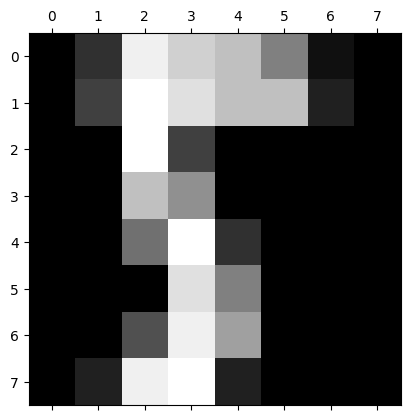

In [32]:
plt.gray()
plt.matshow(digits.images[230])

In [33]:
digits.target[230]

np.int64(5)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [49]:
model1 = SVC(C=1,kernel='linear',gamma=1)
model1.fit(x_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [50]:
model1.score(x_test,y_test)

0.9805555555555555